# **1. Importation des bibliothèques et des données**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Charger le dataset
file_path = "ObesityDataSet_raw_and_data_sinthetic.csv"
df = pd.read_csv(file_path)

# Afficher les premières lignes
print(df.head())

# Voir les informations générales sur le dataset
print(df.info())

# Vérifier s'il y a des valeurs manquantes
print(df.isnull().sum())


   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

# **2. Prétraitement des données**

In [ ]:
# Vérifier les variables catégoriques
categorical_features = df.select_dtypes(include=['object']).columns
print("Variables catégoriques:", categorical_features)

# Encodage des variables catégoriques
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

Variables catégoriques: Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931,0.048394,0.205725,...,0.003652,0.020286,-0.554448,-0.063064,-0.160927,0.110675,0.250082,-0.054835,-0.056291,0.168847
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912,0.618466,0.247684,...,0.028996,-0.010471,-0.089684,0.036951,-0.106700,-0.037693,0.304150,-0.064443,-0.059212,0.008857
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561,0.161668,0.496820,...,-0.021745,-0.037300,0.059332,-0.100805,-0.370099,0.107174,0.443793,0.558662,-0.187748,-0.068593
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135,-0.274505,0.040372,...,-0.029843,-0.007512,0.057966,0.013991,-0.062828,-0.194922,-0.021042,0.463421,-0.115437,-0.118467
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326,0.067600,0.071370,...,0.023312,0.003875,-0.056849,0.006502,0.027052,-0.145691,0.030653,0.172090,-0.093069,-0.097527
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965,0.107930,0.147437,...,0.026139,-0.000946,0.037504,0.008307,-0.102168,0.075940,-0.086071,0.139303,0.033025,0.011150
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562,0.189607,-0.056673,...,0.067129,-0.016351,-0.048751,0.108927,0.110591,-0.012367,-0.018291,-0.172988,0.021820,-0.024508
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000,0.017269,0.022943,...,-0.021725,-0.067402,0.143597,0.073404,0.011789,0.013847,-0.094833,-0.037240,-0.029415,0.025833
Gender_Male,0.048394,0.618466,0.161668,-0.274505,0.067600,0.107930,0.189607,0.017269,1.000000,0.102512,...,0.057001,0.045203,-0.160184,0.039317,0.002213,0.044334,0.394418,-0.428249,-0.004726,0.110873
family_history_with_overweight_yes,0.205725,0.247684,0.496820,0.040372,0.071370,0.147437,-0.056673,0.022943,0.102512,1.000000,...,-0.015435,-0.051011,-0.058927,-0.067076,-0.285109,0.187851,0.187576,0.201104,-0.100173,0.124331


<Axes: >

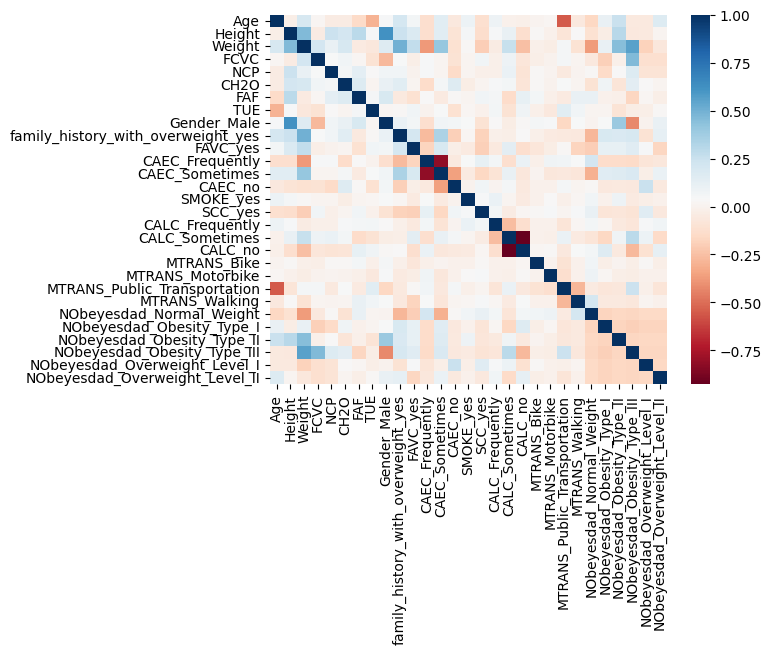

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# Calculate correlation matrix on the encoded DataFrame
corr_encoded = df.corr()

# Display the correlation matrix
display(corr_encoded)

# Plot the correlation heatmap
sns.heatmap(corr_encoded, xticklabels=corr_encoded.columns,
            yticklabels=corr_encoded.columns, cmap='RdBu')

In [ ]:
df.keys()

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'],
      dtype='object')

In [ ]:
df.shape

(2111, 29)

In [ ]:
display(df.isnull().any())
display(df.isnull().sum())

,0
Age,False
Height,False
Weight,False
FCVC,False
NCP,False
CH2O,False
FAF,False
TUE,False
Gender_Male,False
family_history_with_overweight_yes,False


,0
Age,0
Height,0
Weight,0
FCVC,0
NCP,0
CH2O,0
FAF,0
TUE,0
Gender_Male,0
family_history_with_overweight_yes,0


In [ ]:
#---Obtenir les 3 caractéristiques les plus corrélées.---
# Assuming 'Weight' is the correct column name after encoding
print(df.corr().abs().nlargest(3, 'Weight').index)
print(df.corr().abs().nlargest(3, 'Weight').values[:, df.columns.get_loc('Weight')])

Index(['Weight', 'NObeyesdad_Obesity_Type_III',
       'family_history_with_overweight_yes'],
      dtype='object')
[1.         0.55866164 0.49682038]


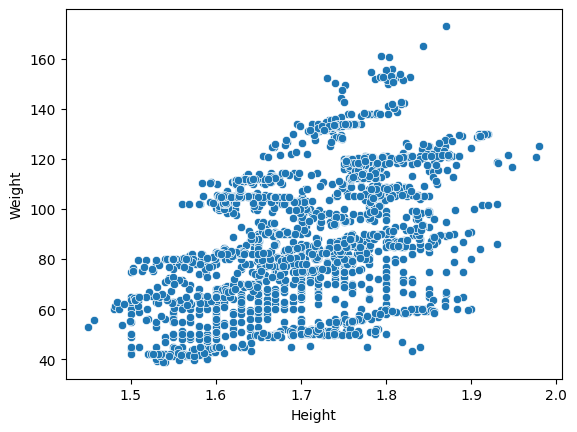

In [ ]:
# Assuming the column is named "Height" instead of "height"
sns.scatterplot(x='Height', y='Weight', data=df)

# Display the plot
plt.show()

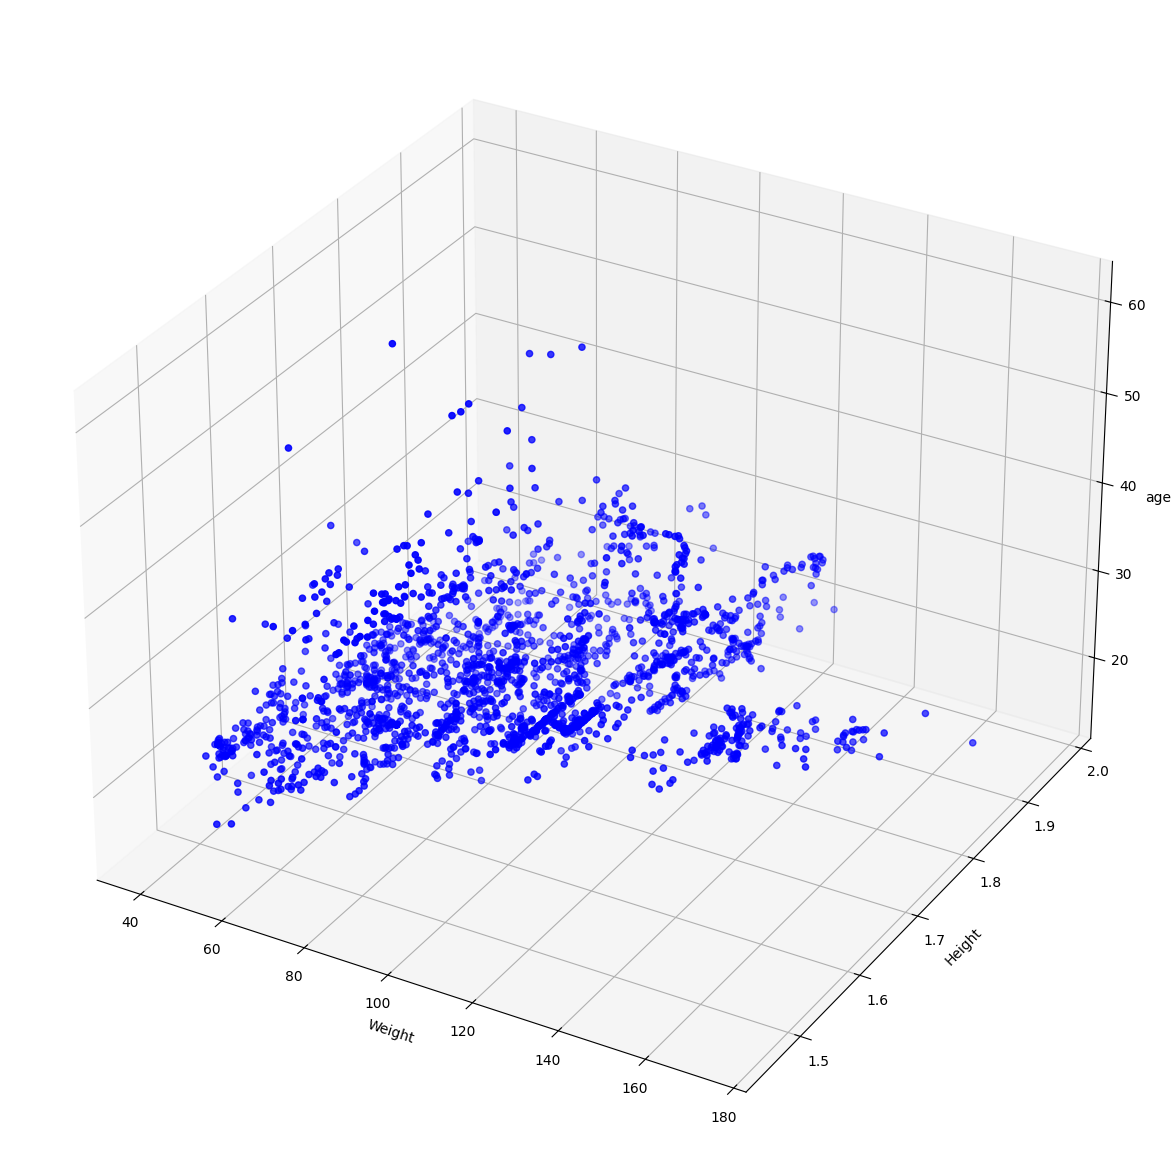

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Weight'],
           df['Height'],
           df['Age'],
           c='b')

ax.set_xlabel("Weight")
ax.set_ylabel("Height")
ax.set_zlabel("age")
plt.show()

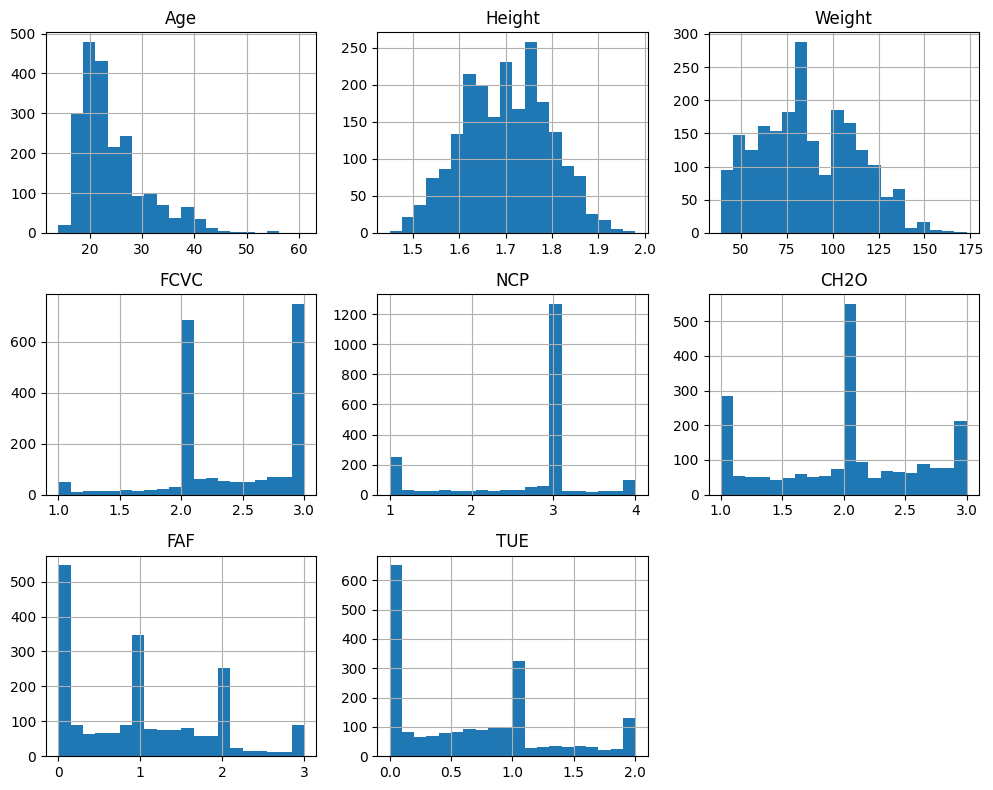

In [ ]:
# Histogramme pour chaque feature numérique
df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()


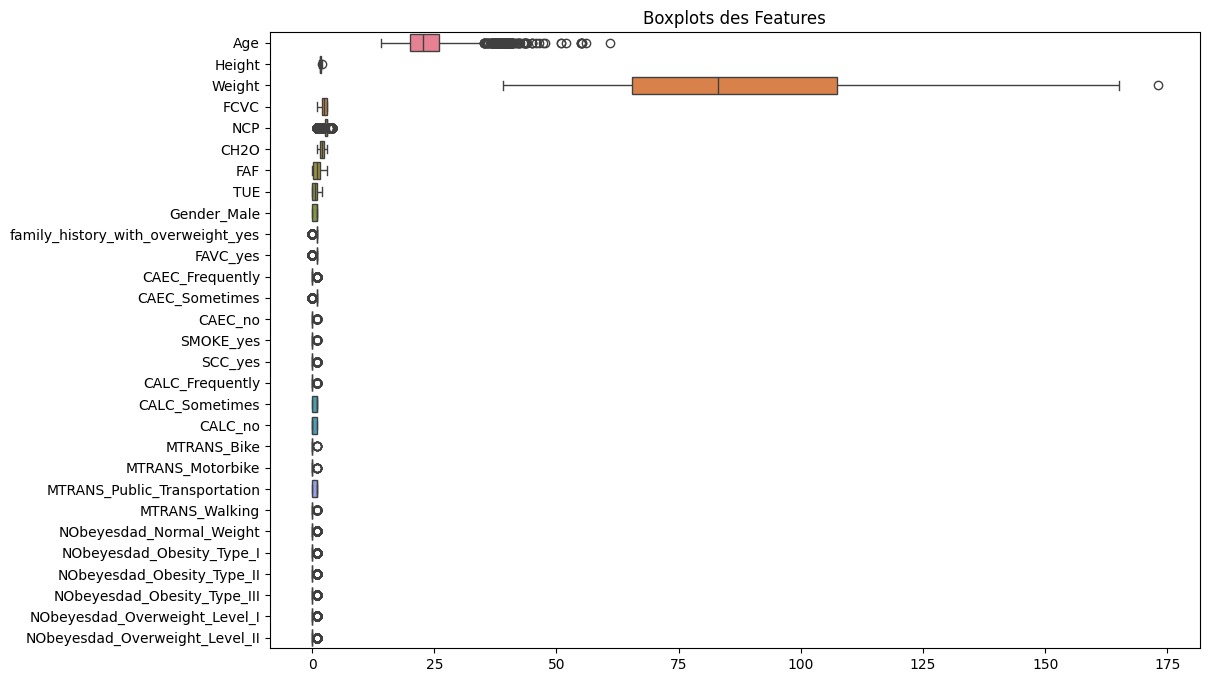

In [ ]:
# Boxplot pour chaque feature numérique
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h')
plt.title("Boxplots des Features")
plt.show()


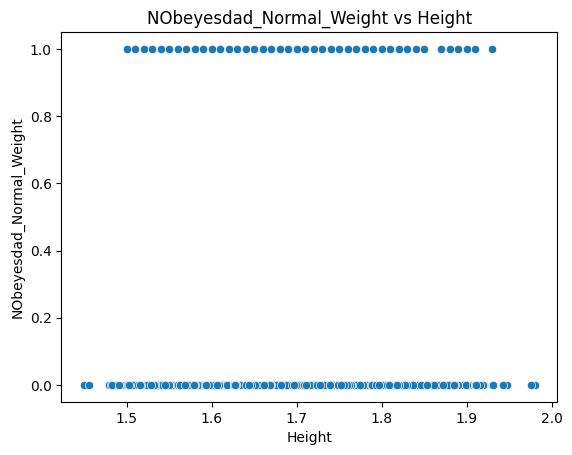

In [ ]:
# Scatter plot entre 'Price' et 'Height'
sns.scatterplot(x='Height', y='NObeyesdad_Normal_Weight', data=df)
plt.title("NObeyesdad_Normal_Weight vs Height")
plt.show()

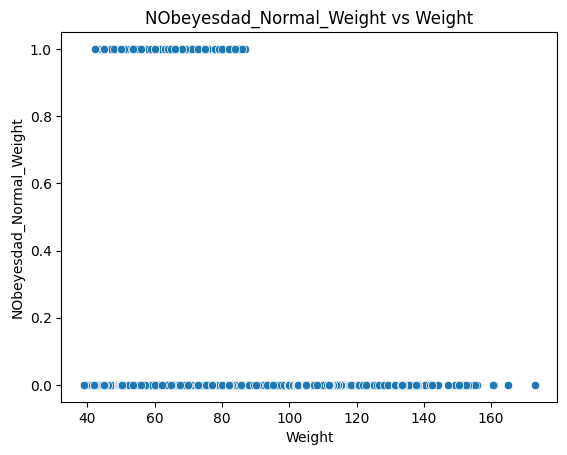

In [ ]:
# Scatter plot entre 'Price' et 'Height'
sns.scatterplot(x='Weight', y='NObeyesdad_Normal_Weight', data=df)
plt.title("NObeyesdad_Normal_Weight vs Weight")
plt.show()

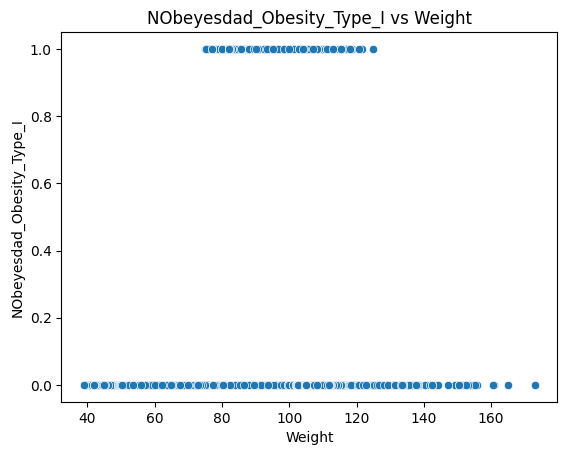

In [ ]:
# Scatter plot entre 'Price' et 'Height'
sns.scatterplot(x='Weight', y='NObeyesdad_Obesity_Type_I', data=df)
plt.title("NObeyesdad_Obesity_Type_I vs Weight")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Remettre la colonne originale si nécessaire
df["NObeyesdad"] = df[['NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
                        'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
                        'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II']].idxmax(axis=1)

# Encoder en chiffres
label_encoder = LabelEncoder()
df["NObeyesdad"] = label_encoder.fit_transform(df["NObeyesdad"])

X = df.drop(columns=["NObeyesdad"])
y = df["NObeyesdad"]


✅ 'NObeyesdad' recréée avec succès !


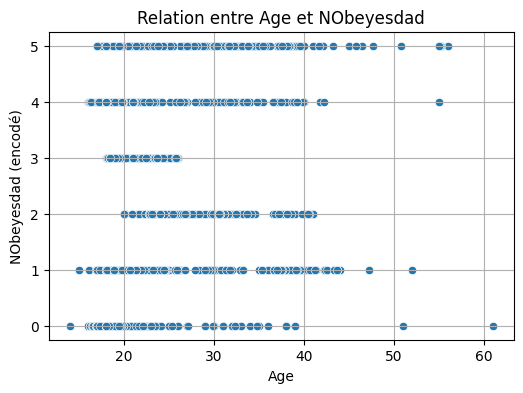

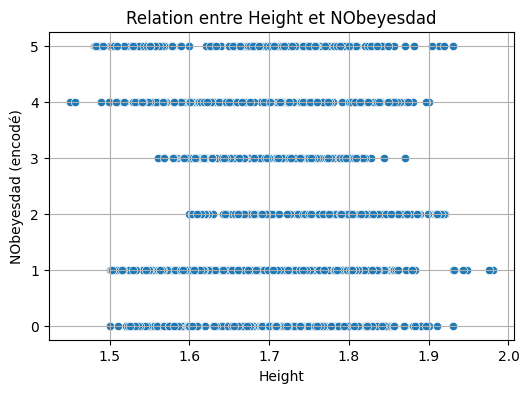

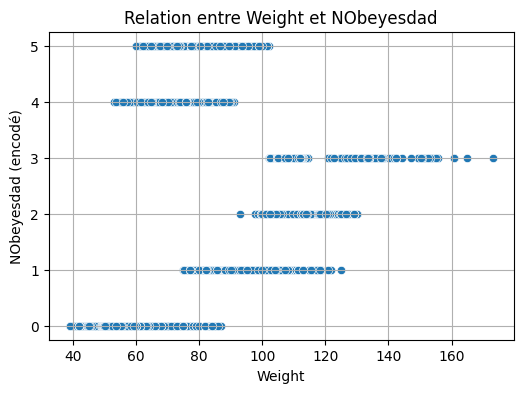

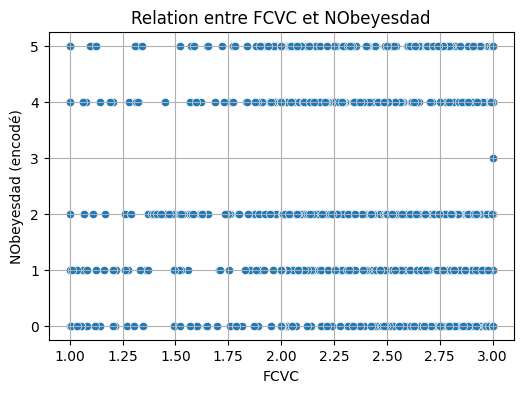

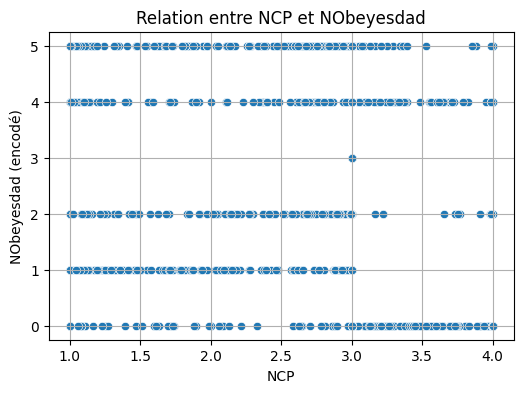

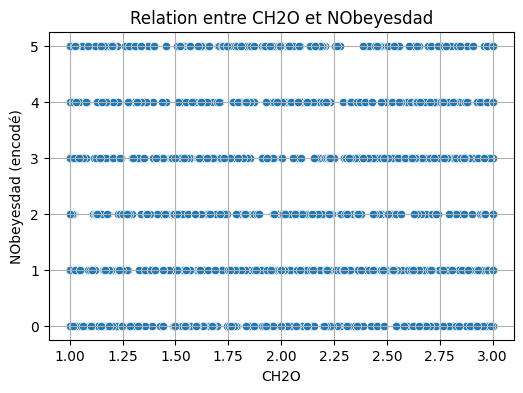

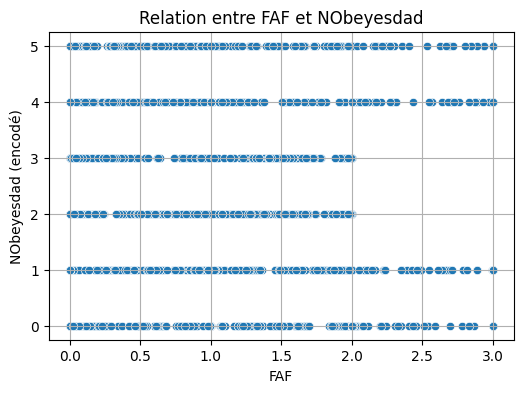

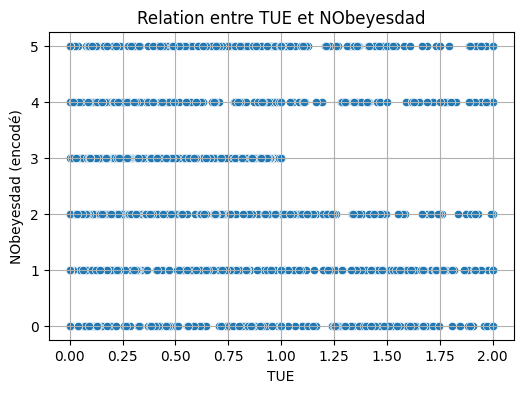

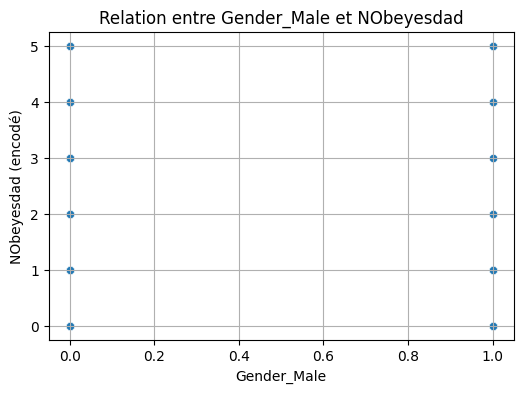

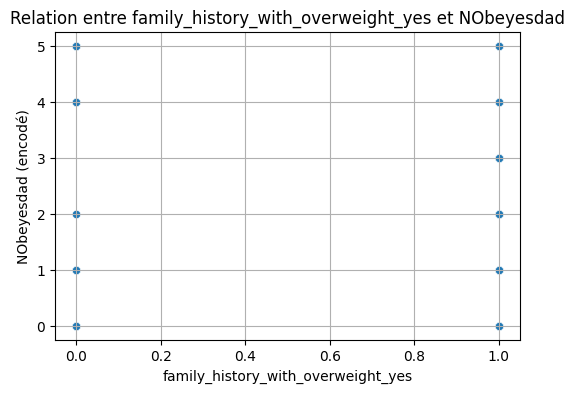

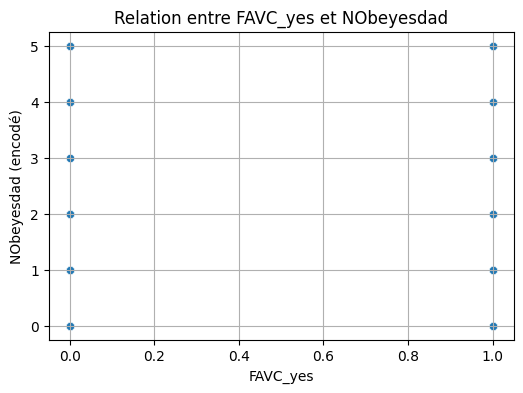

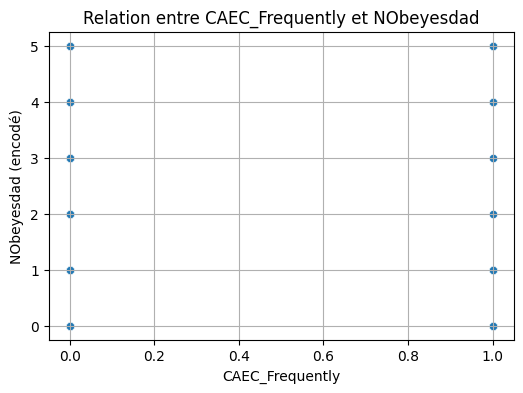

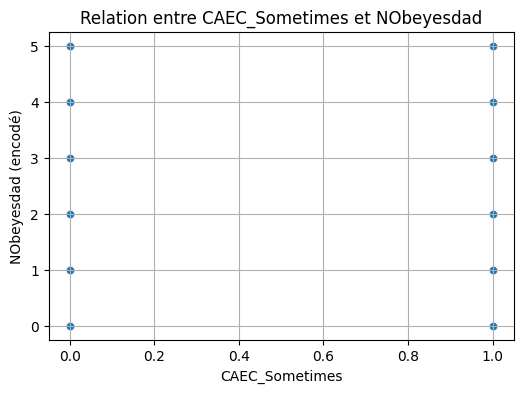

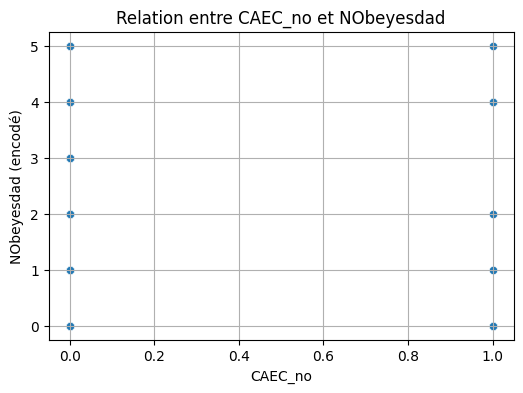

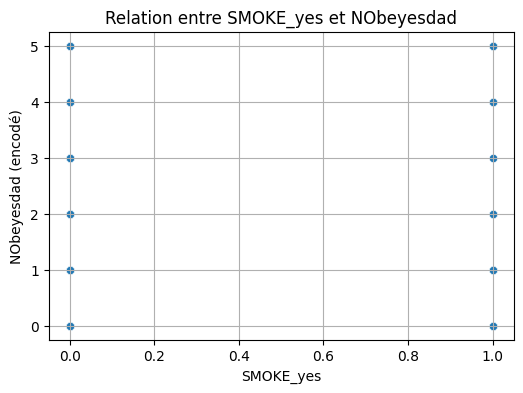

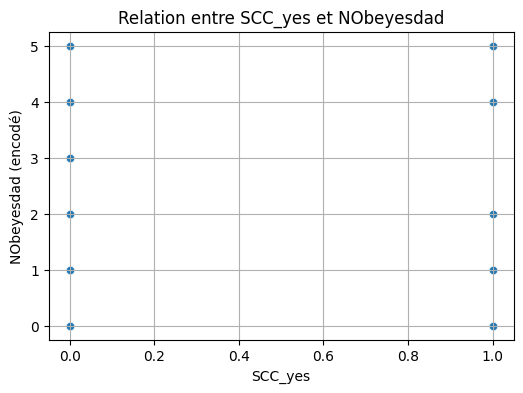

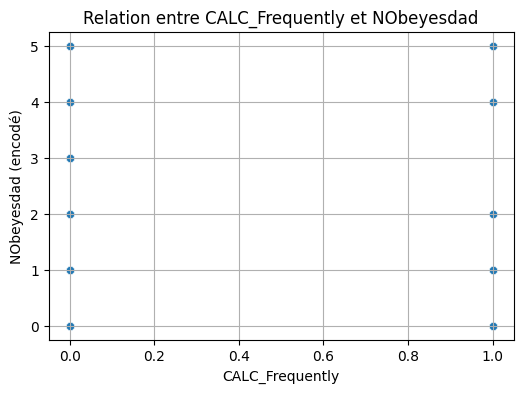

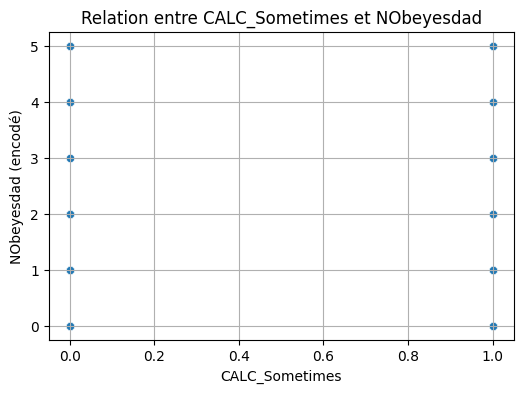

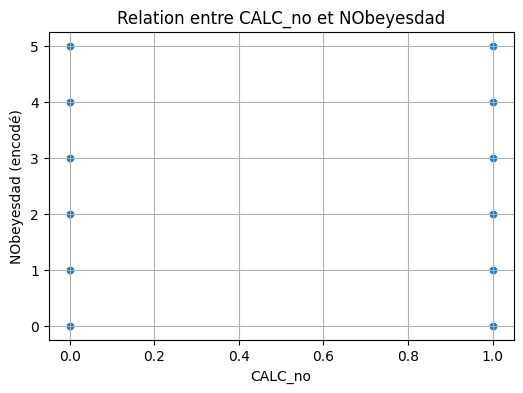

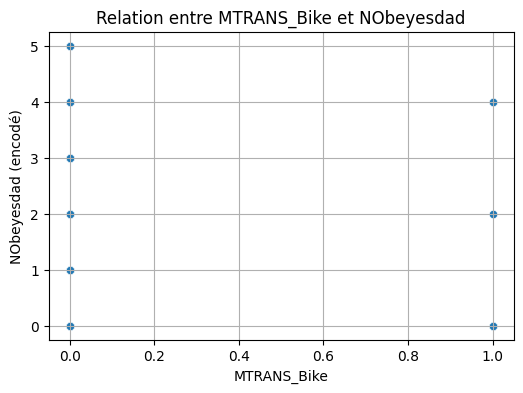

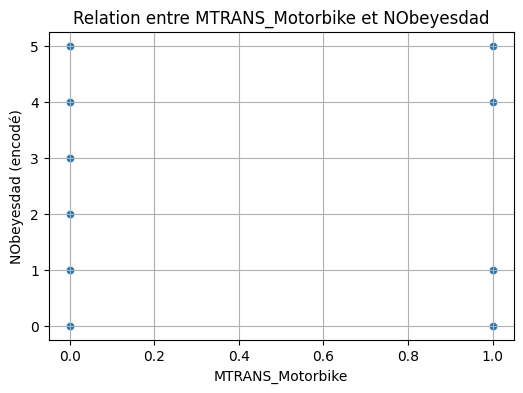

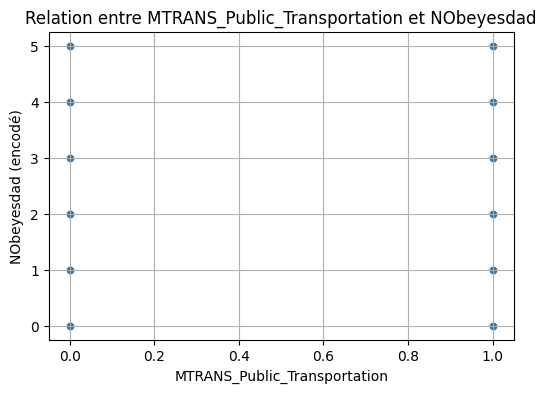

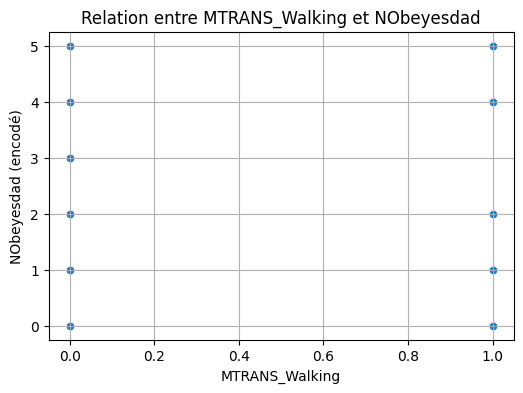

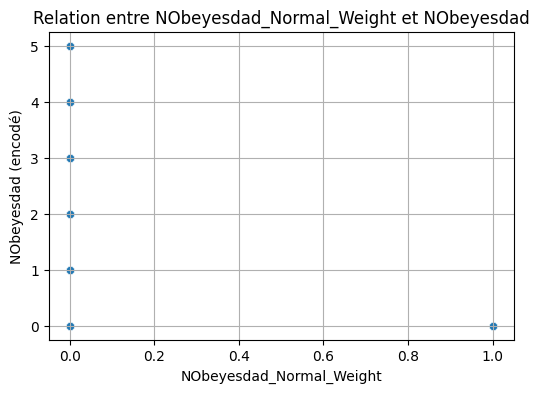

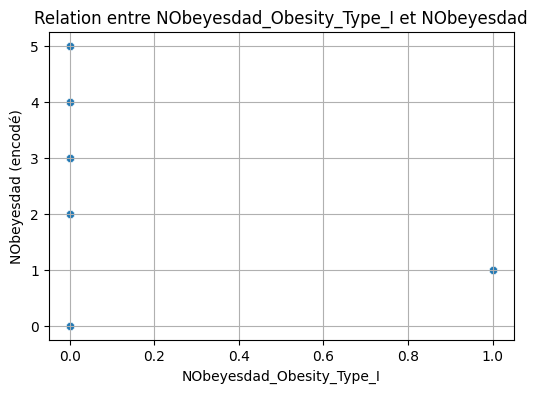

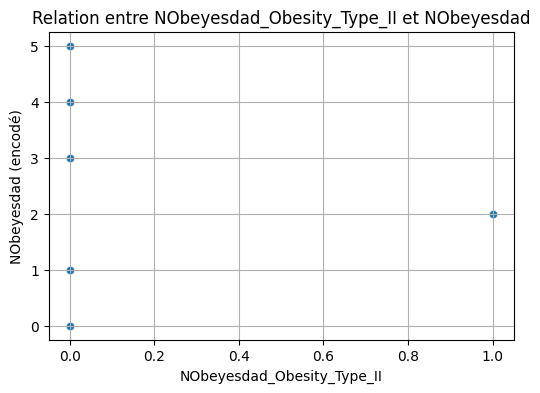

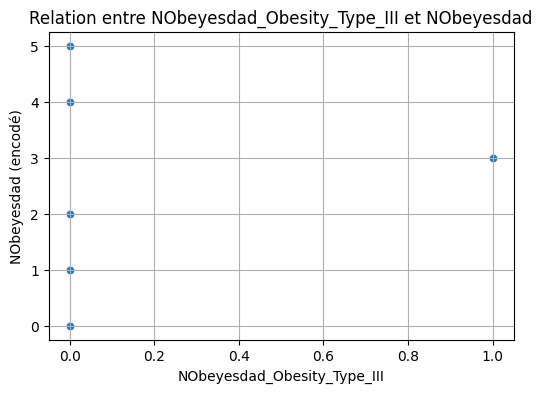

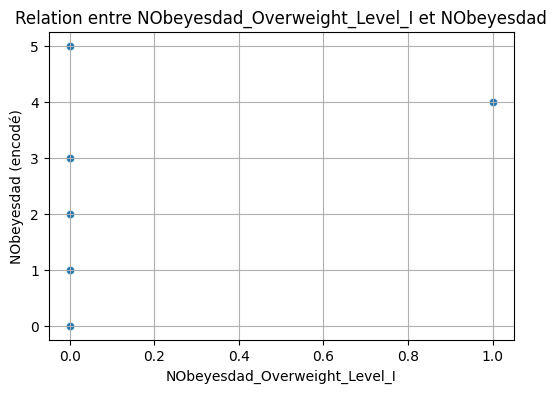

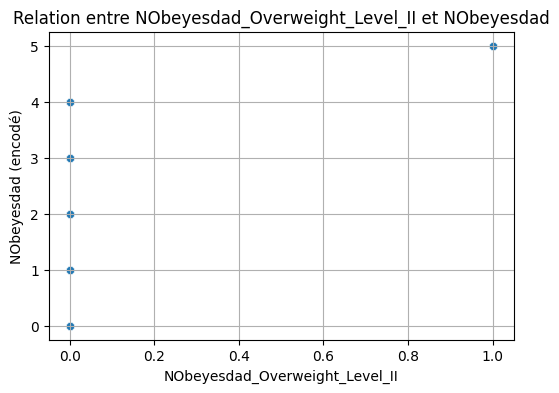

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Reconstruction de la colonne "NObeyesdad"
target_columns = [
    'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
    'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
    'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'
]

if all(col in df.columns for col in target_columns):
    df['NObeyesdad'] = df[target_columns].idxmax(axis=1).str.replace('NObeyesdad_', '')
    print("✅ 'NObeyesdad' recréée avec succès !")
else:
    print("❌ Impossible de reconstruire 'NObeyesdad'. Vérifiez les colonnes !")
    exit()

# Encodage de la target
label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

# Séparer les features et la target
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

# Liste des features
features = X.columns

# 📊 **Tracer chaque feature séparément pour éviter la fusion des courbes**
for feature in features:
    plt.figure(figsize=(6, 4))  # Nouvelle figure pour chaque feature
    sns.scatterplot(x=df[feature], y=df['NObeyesdad'])
    plt.title(f'Relation entre {feature} et NObeyesdad')
    plt.xlabel(feature)
    plt.ylabel("NObeyesdad (encodé)")
    plt.grid(True)
    plt.show()


In [ ]:
# Division en 80% entraînement + 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Division du train en 80% train et 20% validation (64% train, 16% val, 20% test)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Vérifier les tailles
print("Taille de l'ensemble d'entraînement :", X_train.shape)
print("Taille de l'ensemble de validation :", X_val.shape)
print("Taille de l'ensemble de test :", X_test.shape)

Taille de l'ensemble d'entraînement : (1350, 29)
Taille de l'ensemble de validation : (338, 29)
Taille de l'ensemble de test : (423, 29)


# **3. Normalisation des données**

In [ ]:
# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


# **4. Initialisation et entraînement des modèles**

In [ ]:
# Initialisation des modèles avec régularisation
alpha = 0.1  # Paramètre de régularisation

lasso = Lasso(alpha=alpha)
ridge = Ridge(alpha=alpha)
elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5)  # 50% L1, 50% L2

# Entraînement des modèles
lasso.fit(X_train_scaled, y_train)



Lasso(alpha=0.1)

In [ ]:
ridge.fit(X_train_scaled, y_train)


Ridge(alpha=0.1)

In [ ]:
elastic_net.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.1)

# **5. Validation et évaluation des modèles**

In [ ]:
# Fonction d'évaluation
def evaluate_model(model, X_val, y_val, X_test, y_test, name):
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    mse_val = mean_squared_error(y_val, y_val_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_val = r2_score(y_val, y_val_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print(f"{name} - Validation: MSE = {mse_val:.4f}, R² = {r2_val:.4f}")
    print(f"{name} - Test: MSE = {mse_test:.4f}, R² = {r2_test:.4f}")
    return mse_val, mse_test, r2_val, r2_test

# Évaluation des modèles
results = {}
print("The model performance of the Lasso regression")
print("--------------------------------------")
# Lasso regression
results["Lasso"] = evaluate_model(lasso, X_val_scaled, y_val, X_test_scaled, y_test, "Lasso")



The model performance of the Lasso regression
--------------------------------------
Lasso - Validation: MSE = 0.1022, R² = 0.9681
Lasso - Test: MSE = 0.1132, R² = 0.9628


In [ ]:
print("The model performance of the Ridge regression")
print("--------------------------------------")
# Ridge regression
results["Ridge"] = evaluate_model(ridge, X_val_scaled, y_val, X_test_scaled, y_test, "Ridge")



The model performance of the Ridge regression
--------------------------------------
Ridge - Validation: MSE = 0.0000, R² = 1.0000
Ridge - Test: MSE = 0.0000, R² = 1.0000


In [ ]:
print("The model performance of the ElasticNet regression")
print("--------------------------------------")
# ElasticNet regression
results["ElasticNet"] = evaluate_model(elastic_net, X_val_scaled, y_val, X_test_scaled, y_test, "ElasticNet")

The model performance of the ElasticNet regression
--------------------------------------
ElasticNet - Validation: MSE = 0.0767, R² = 0.9761
ElasticNet - Test: MSE = 0.0802, R² = 0.9736


# **6. Régression polynomiale**

In [ ]:
# Transformation polynomiale du degré 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Initialisation et entraînement du modèle polynomial
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Évaluation de la régression polynomiale
results["Polynomial"] = evaluate_model(poly_reg, X_val_poly, y_val, X_test_poly, y_test, "Polynomial")


Polynomial - Validation: MSE = 0.0077, R² = 0.9976
Polynomial - Test: MSE = 0.0030, R² = 0.9990


# **7. Visualisation des résultat**

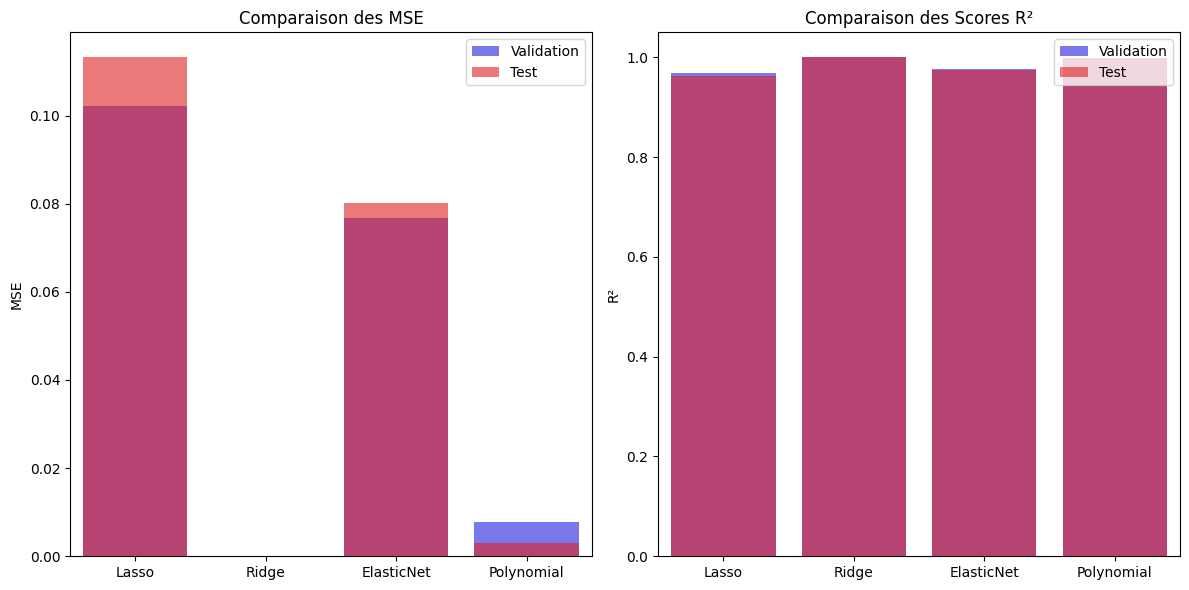

In [ ]:
# Extraction des valeurs
models = list(results.keys())
mse_val_values = [results[m][0] for m in models]
mse_test_values = [results[m][1] for m in models]
r2_val_values = [results[m][2] for m in models]
r2_test_values = [results[m][3] for m in models]

# Comparaison des performances des modèles
plt.figure(figsize=(12, 6))

# MSE Comparaison
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=mse_val_values, label="Validation", color="blue", alpha=0.6)
sns.barplot(x=models, y=mse_test_values, label="Test", color="red", alpha=0.6)
plt.legend()
plt.title("Comparaison des MSE")
plt.ylabel("MSE")

# R² Comparaison
plt.subplot(1, 2, 2)
sns.barplot(x=models, y=r2_val_values, label="Validation", color="blue", alpha=0.6)
sns.barplot(x=models, y=r2_test_values, label="Test", color="red", alpha=0.6)
plt.legend()
plt.title("Comparaison des Scores R²")
plt.ylabel("R²")

plt.tight_layout()
plt.show()
